In [1]:
# Plot H1 rejection rates

import pickle
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

In [2]:
#Model = "logistic"
Index = 1
n = 300
# Lapscale = 0
# Xdist = "uniform"
# sig = 0
# testtype = "Wald"
# fixedU = True
randomBeta = True
K = 5

In [3]:
nList = [300, 2000]

In [4]:
i=0
lm = 0.55

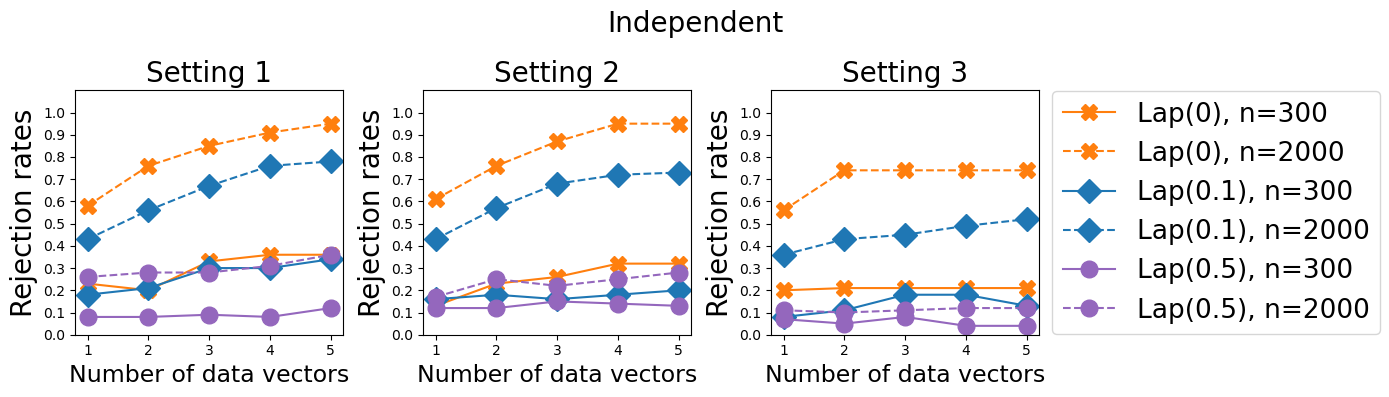

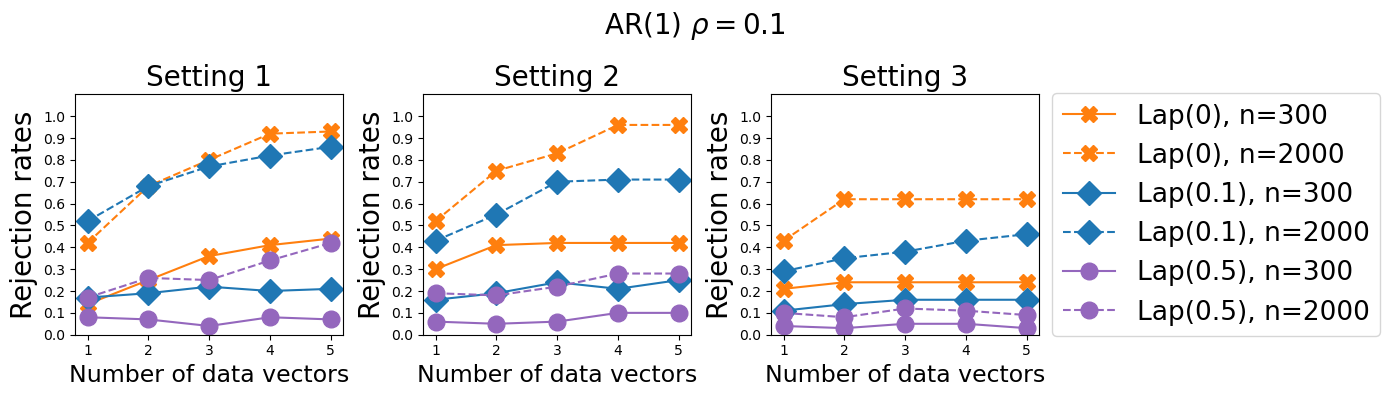

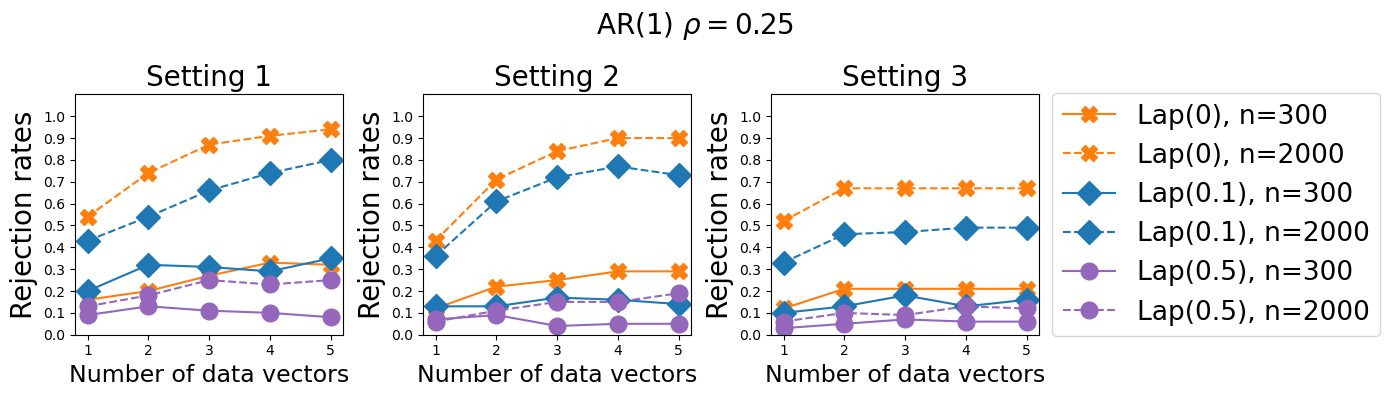

In [20]:
# Model = "logistic"
# Index = 1
# n = 300
# Lapscale = 0
Xdist = "uniform"
# sig = 0
testtype = "Wald"
fixedU = False
randomBeta = True


#ModelList = ["logistic", "normal", "logcosh"]
ModelList = ["logistic"]
sigList = [0, 0.1, 0.25]
LapscaleList = [0, 0.1, 0.5]

for Model in ModelList:
    for sig in sigList:

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^",  "P", "*"]    

        # number of vectors send
        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        # number of data vectors sent
        VecInd = np.array(range(1, (K+1)), int)
        fig = plt.figure()
        fig.set_size_inches(14, 4)   
        fig.suptitle(sigtype, fontsize=20) 
        for i in range(3):
            # setting index
            setInd = i + 1
            # plot the plots in each setting    
            ax = fig.add_subplot(int('13' + str(setInd)))

            
            for LapscaleInd in range(len(LapscaleList)):
                Lapscale = LapscaleList[LapscaleInd]
                rej_arrayList = []
                for nInd in range(len(nList)):
                    n = nList[nInd]

                    fname = Model + "_Setting_" + str(setInd ) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                    infile = open( Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                    new_dict = pickle.load(infile)
                    infile.close()
                    rej_array = new_dict["rej"]
                    # rejection rates for n=300 or 2000
                    rej_arrayList.append(np.mean(rej_array, axis = 0))
                ax.plot(VecInd, rej_arrayList[0], label = 'Lap(' + str(Lapscale)+ '), n=' + str(nList[0]), color = colorList[LapscaleInd], marker = markerList[(nInd * LapscaleInd)], markersize=12)
                ax.plot(VecInd, rej_arrayList[1], label = 'Lap(' + str(Lapscale)+ '), n=' + str(nList[1]), color = colorList[LapscaleInd], marker = markerList[(nInd * LapscaleInd)], linestyle = '--', markersize=12)

            if i==2:
                plt.legend(prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
            elif i<2:
                plt.legend('',frameon=False)
            plt.ticklabel_format(style='plain', axis='x', useOffset=False)
            plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
            plt.ylim([0,1.1])
            plt.yticks(np.arange(0,1.04,0.1))
            ax.set_xlabel("Number of data vectors", fontsize=17)
            ax.set_ylabel("Rejection rates", fontsize=20)
            ax.set_title("Setting "+str(setInd), fontsize=20)
            plt.tight_layout()
        fname = Model + "testSetting_H1"+ "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + str(fixedU)  
        # plt.savefig(Model + "_results/Result_Figure/ResultsH1" + fname +'.pdf')


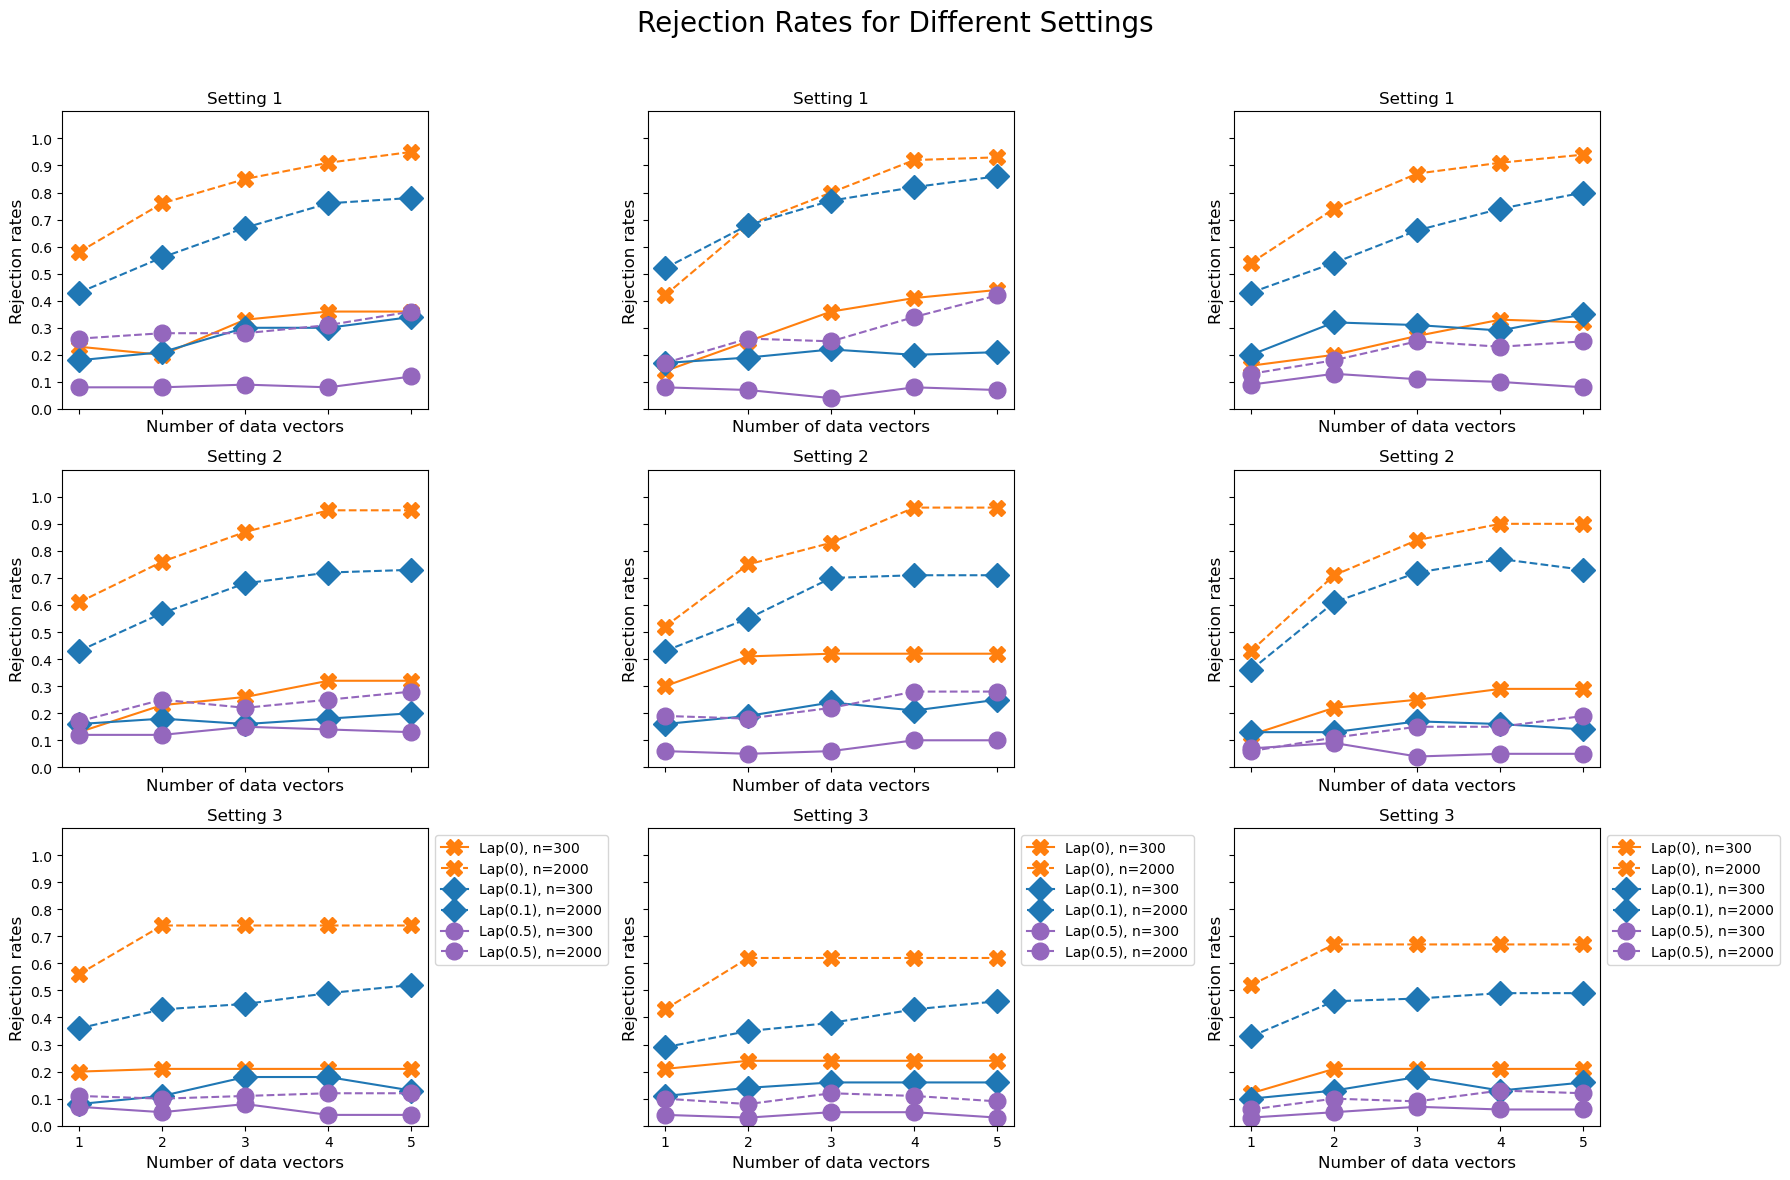

In [31]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

for row, Model in enumerate(ModelList):
    for col, sig in enumerate(sigList):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^",  "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        for i in range(3):
            setInd = i + 1
            ax = axs[i, col]

            for LapscaleInd in range(len(LapscaleList)):
                Lapscale = LapscaleList[LapscaleInd]
                rej_arrayList = []

                for nInd in range(len(nList)):
                    n = nList[nInd]

                    fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                    infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                    new_dict = pickle.load(infile)
                    infile.close()
                    rej_array = new_dict["rej"]
                    rej_arrayList.append(np.mean(rej_array, axis=0))

                ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
                ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

            if i == 2:
                ax.legend(prop={'size': 10}, loc='upper left', bbox_to_anchor=(1, 1))
            elif i < 2:
                ax.legend('', frameon=False)

            ax.ticklabel_format(style='plain', axis='x', useOffset=False)
            ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
            ax.set_ylim([0, 1.1])
            ax.set_yticks(np.arange(0, 1.04, 0.1))
            ax.set_xlabel("Number of data vectors", fontsize=12)
            ax.set_ylabel("Rejection rates", fontsize=12)
            ax.set_title("Setting " + str(setInd), fontsize=12)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("merged_plot.png")
plt.show()

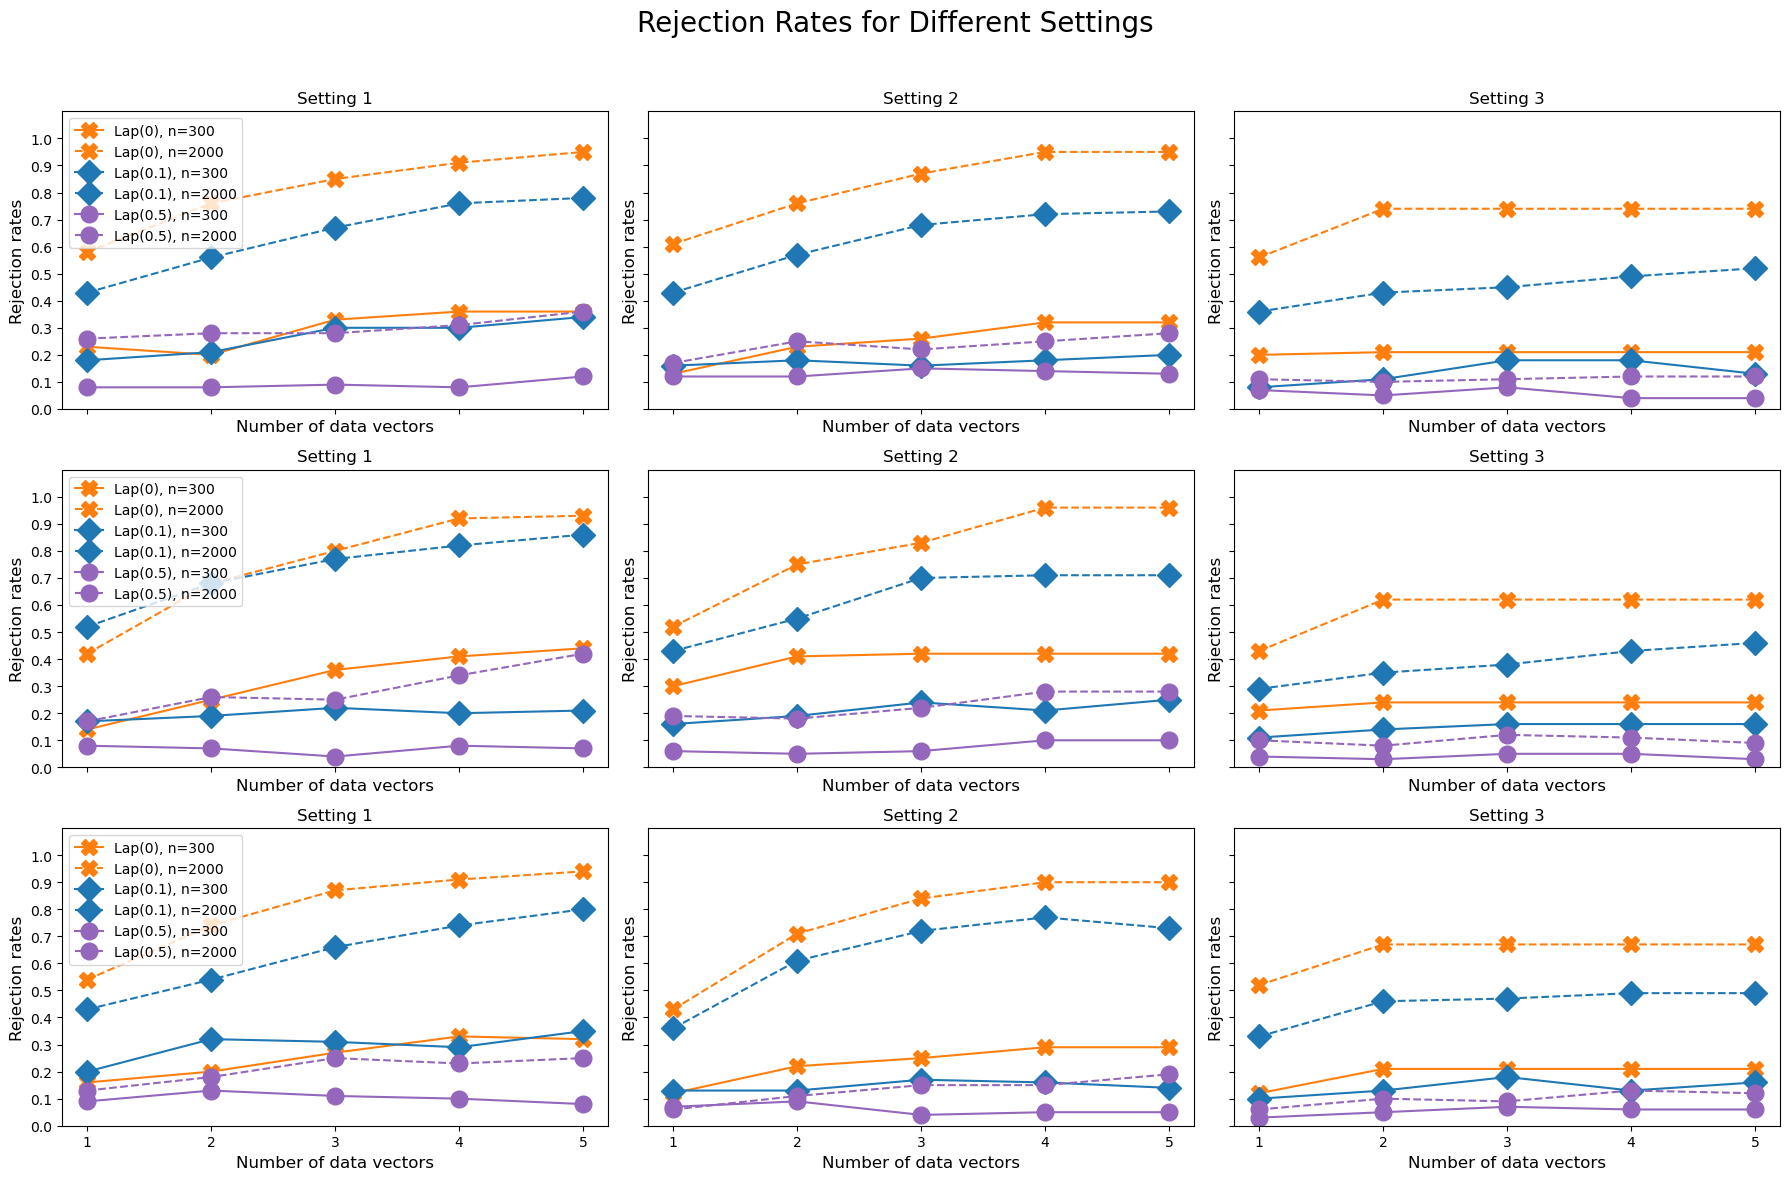

In [32]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

        if setInd == 1:
            ax.legend(prop={'size': 10}, loc='upper left')

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=12)
        ax.set_ylabel("Rejection rates", fontsize=12)
        ax.set_title("Setting " + str(setInd), fontsize=12)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("combined_plot.png")
plt.show()

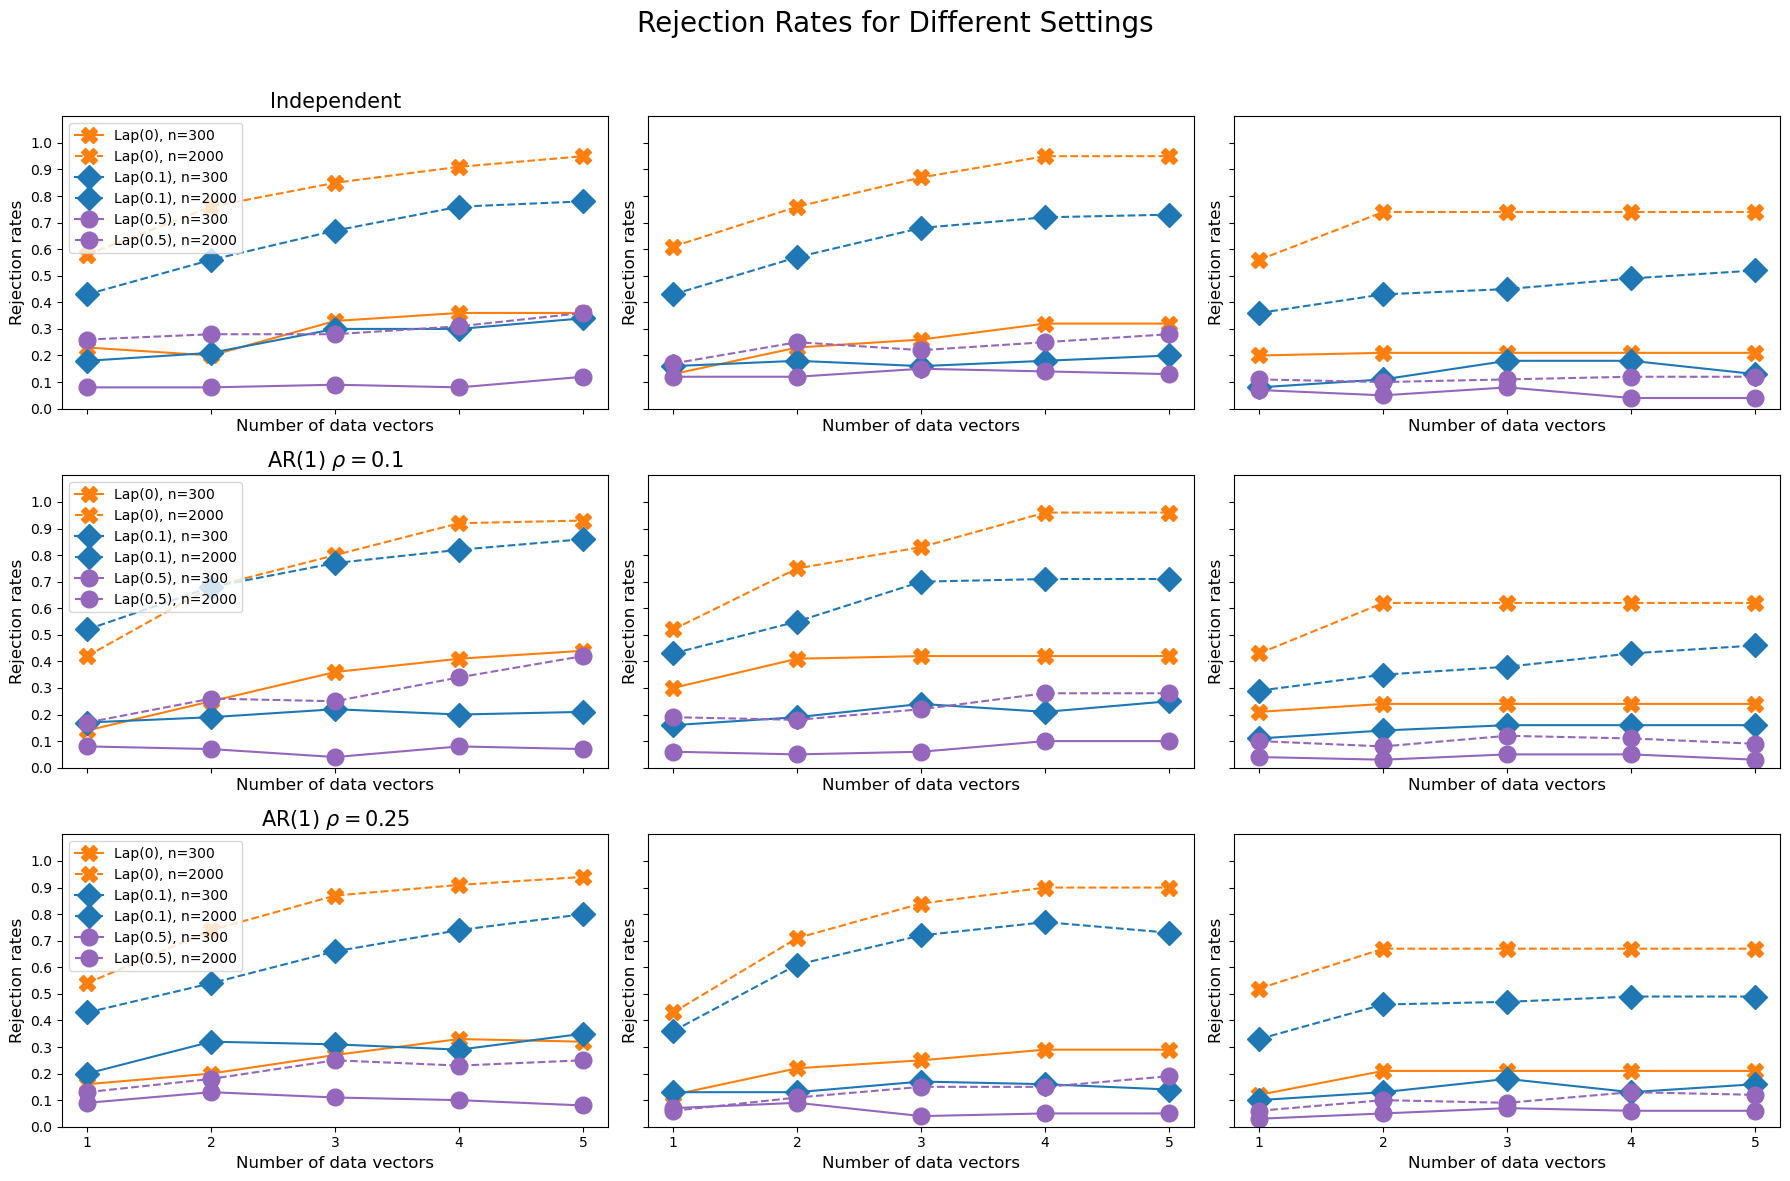

In [33]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitle for each row
        if col == 0:
            ax.set_title(sigtype, fontsize=15)

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

        if setInd == 1:
            ax.legend(prop={'size': 10}, loc='upper left')

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=12)
        ax.set_ylabel("Rejection rates", fontsize=12)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("combined_plot.png")
plt.show()

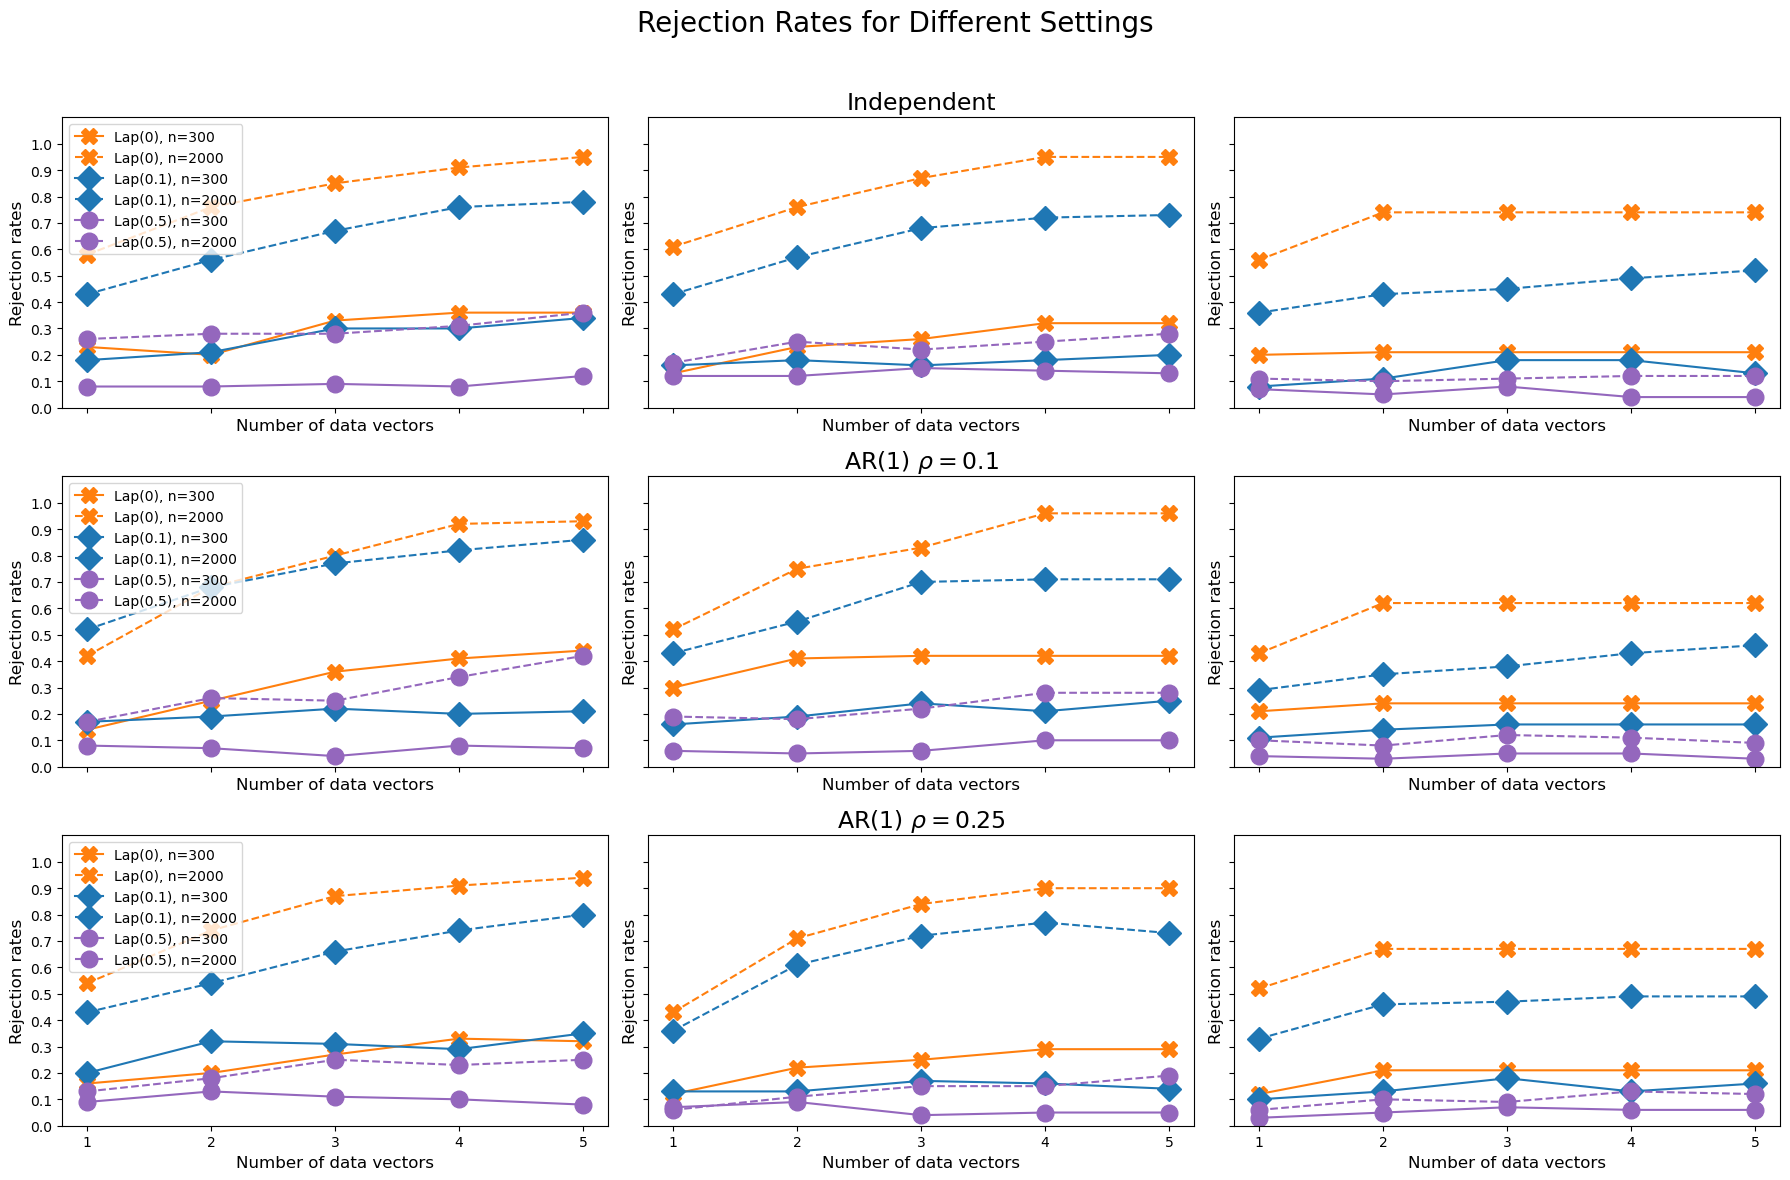

In [37]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitle for each row in the second column
        if col == 1:
            ax.set_title(sigtype, fontsize=17)

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

        if setInd == 1:
            ax.legend(prop={'size': 10}, loc='upper left')

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=12)
        ax.set_ylabel("Rejection rates", fontsize=12)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("combined_plot.png")
plt.show()

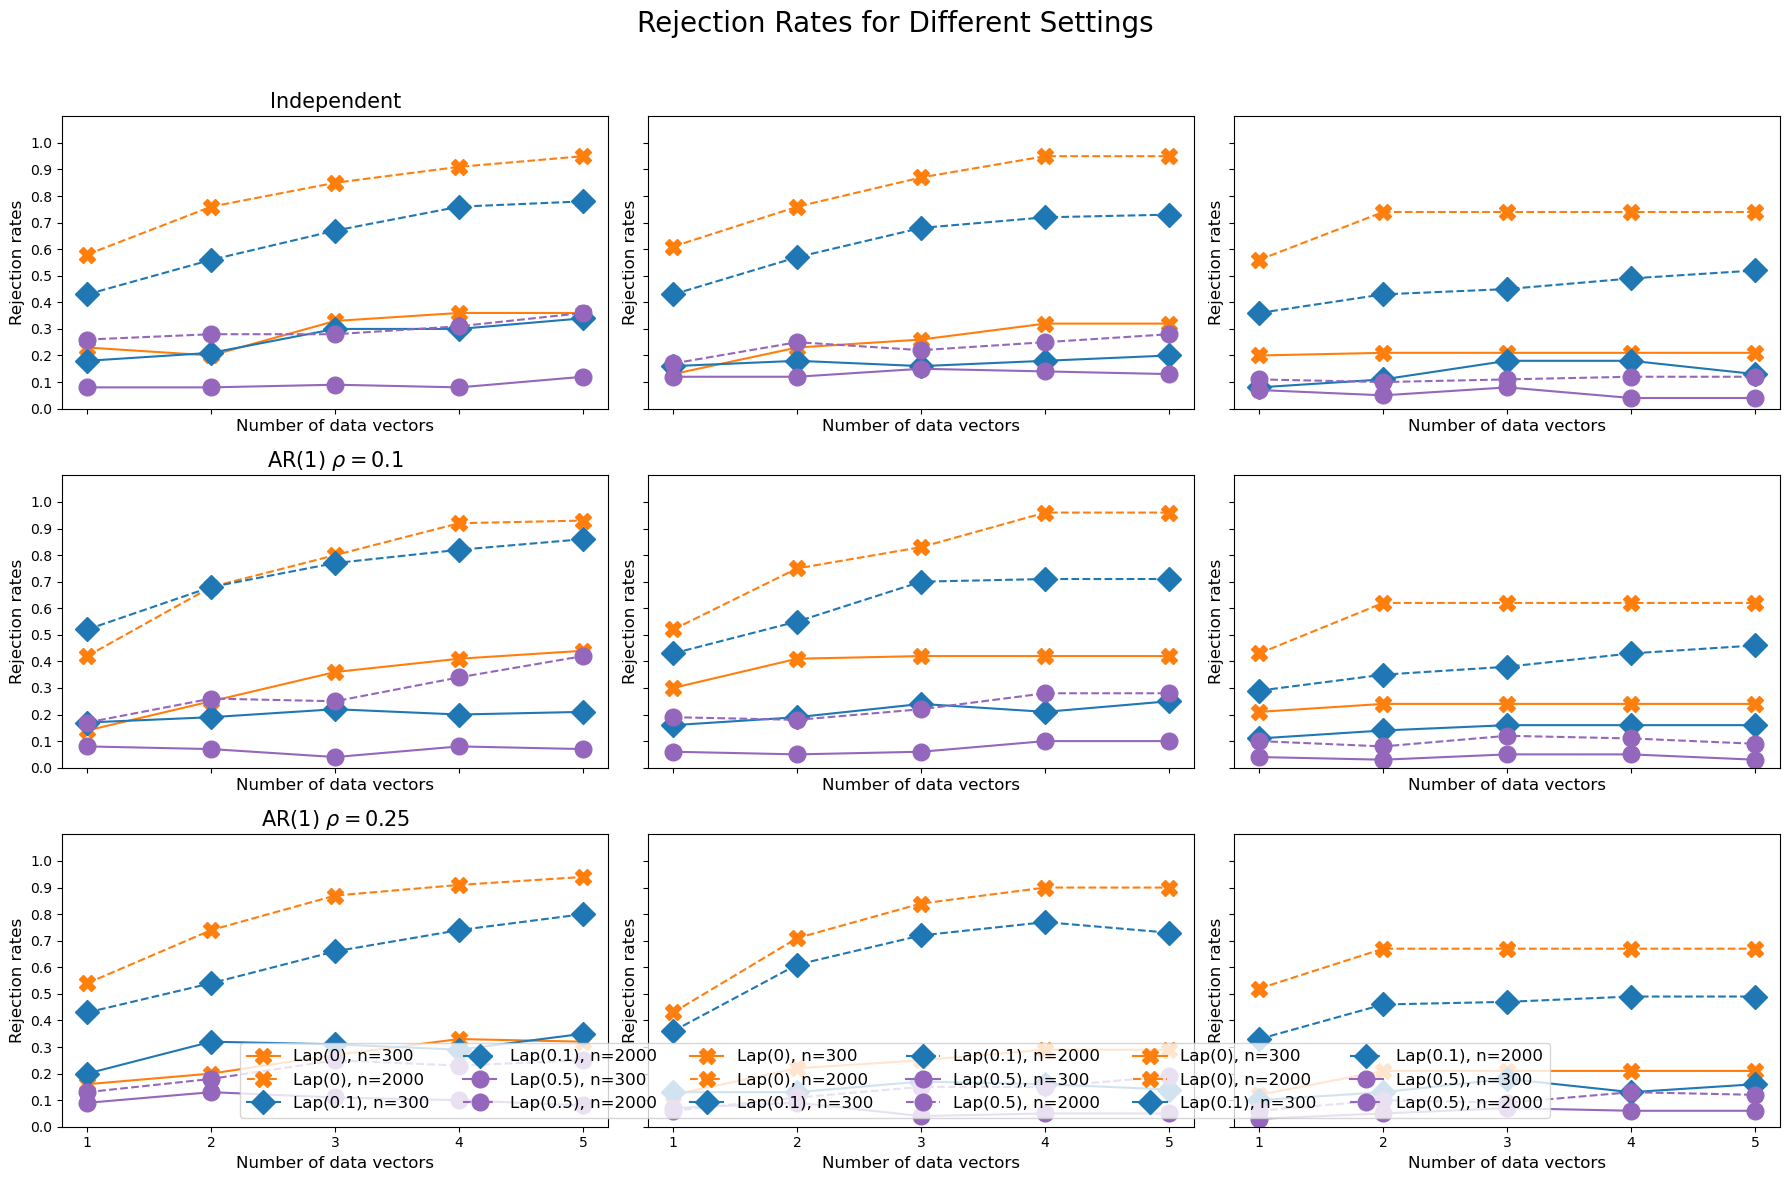

In [48]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

legend_handles = []  # To store legend handles for each subplot
legend_labels = []  # To store legend labels for each subplot

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitle for each row
        if col == 0:
            ax.set_title(sigtype, fontsize=15)

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            line1, = ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            line2, = ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

            if setInd == 1:
                legend_handles.extend([line1, line2])  # Collect handles for legend
                legend_labels.extend([f'Lap({Lapscale}), n={nList[0]}', f'Lap({Lapscale}), n={nList[1]}'])  # Collect labels for legend

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=12)
        ax.set_ylabel("Rejection rates", fontsize=12)

# Add combined legend at the bottom
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.05), prop={'size': 12})

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("combined_plot_with_legend.png")
plt.show()

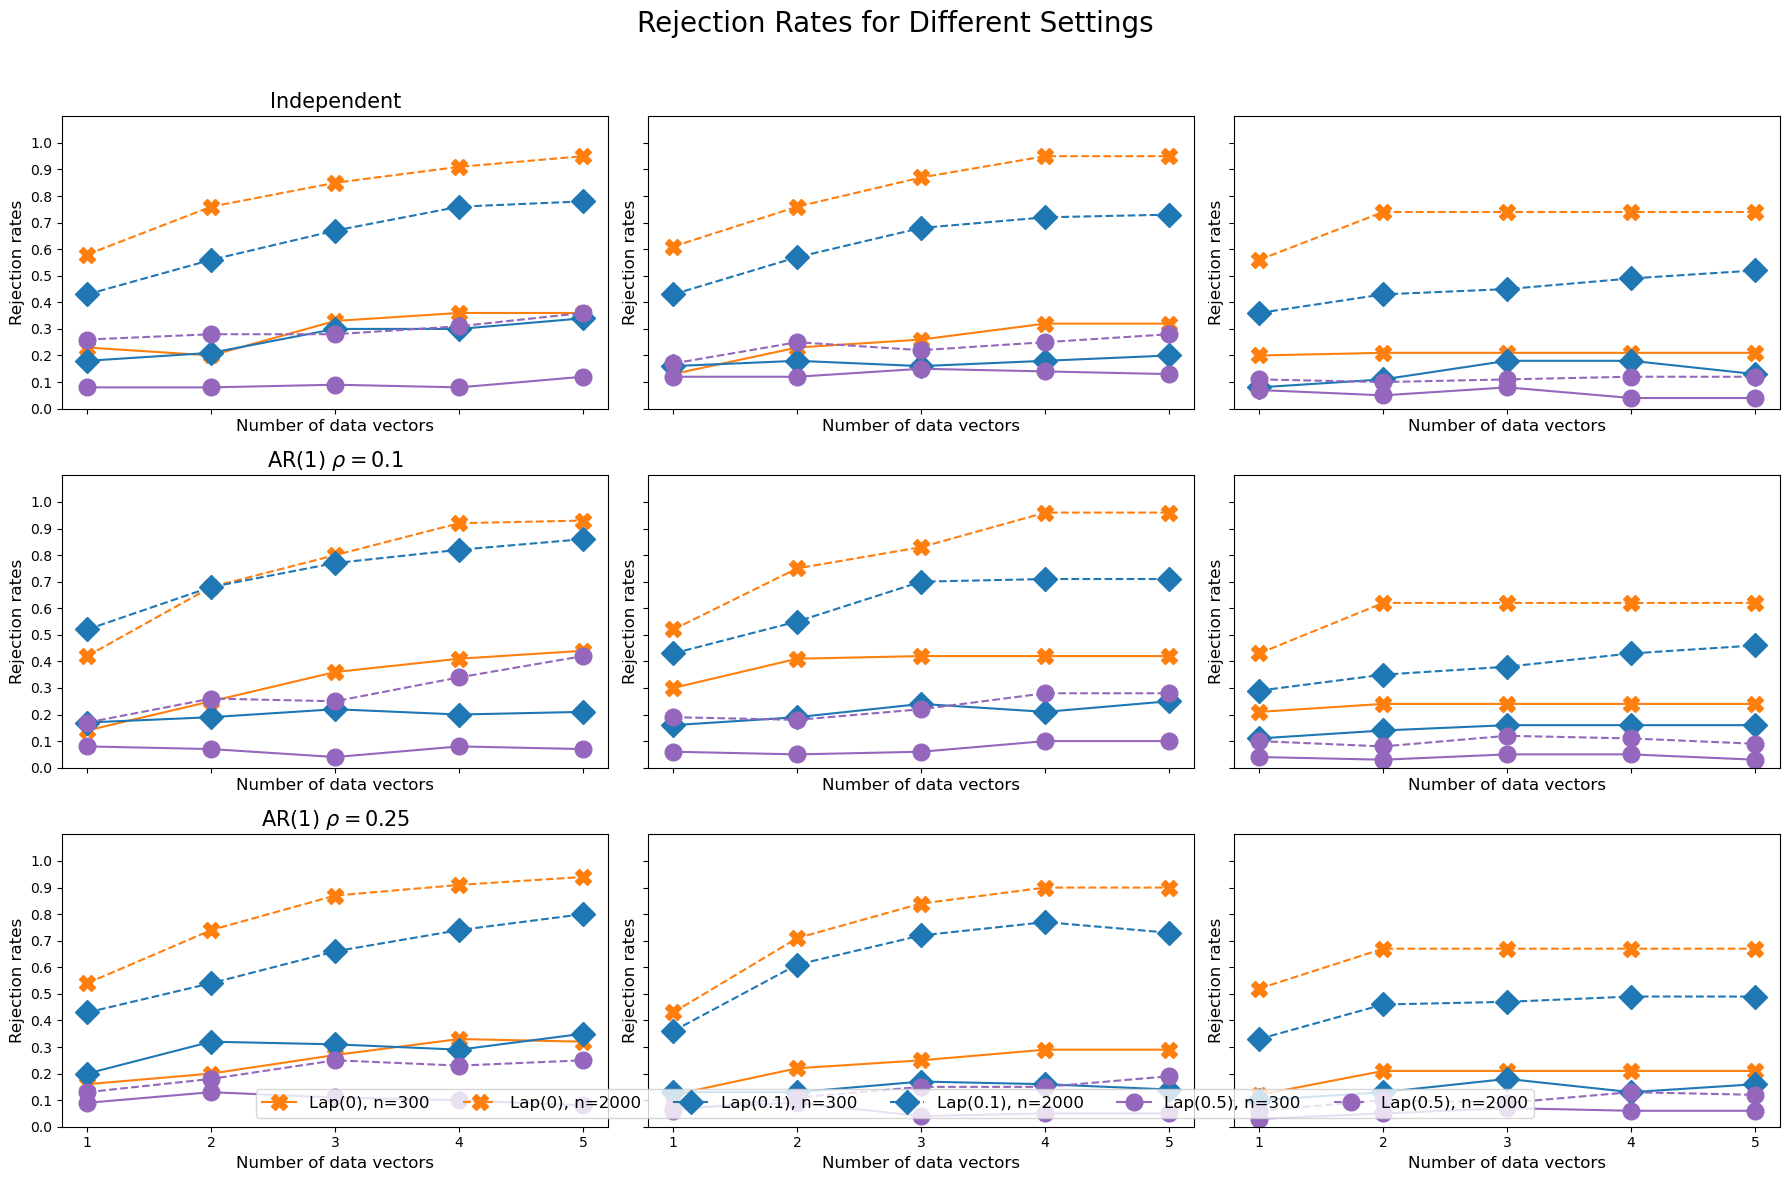

In [52]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

legend_handles = []  # To store legend handles for each subplot
legend_labels = []  # To store legend labels for each subplot

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitle for each row
        if col == 0:
            ax.set_title(sigtype, fontsize=15)

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            line1, = ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            line2, = ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

            if setInd == 1:
                legend_handles.extend([line1, line2])  # Collect handles for legend
                legend_labels.extend([f'Lap({Lapscale}), n={nList[0]}', f'Lap({Lapscale}), n={nList[1]}'])  # Collect labels for legend

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=12)
        ax.set_ylabel("Rejection rates", fontsize=12)

# Add combined legend at the bottom with only the first two columns
fig.legend(handles=legend_handles[:6], labels=legend_labels[:6], loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.05), prop={'size': 12})

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()






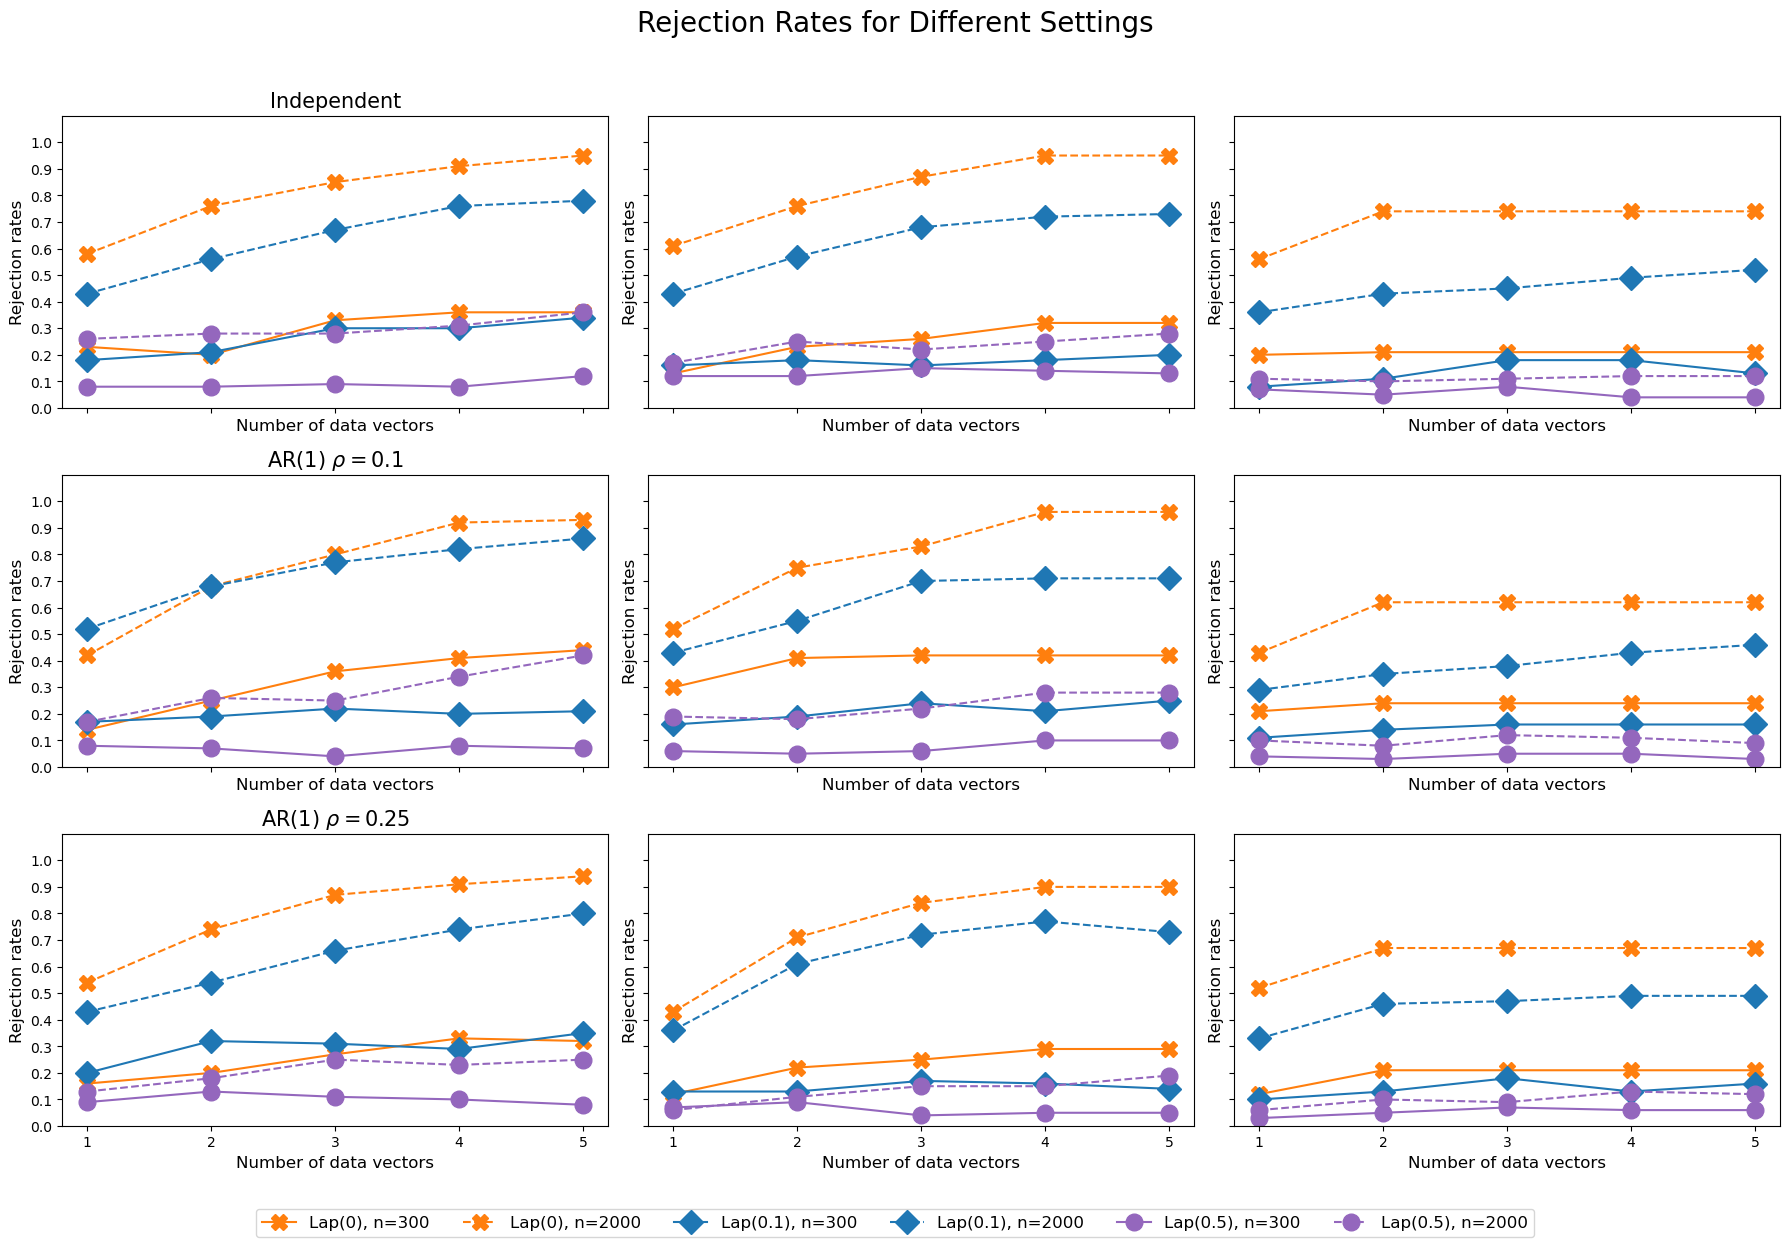

In [56]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=20)

legend_handles = []  # To store legend handles for each subplot
legend_labels = []  # To store legend labels for each subplot

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitle for each row
        if col == 0:
            ax.set_title(sigtype, fontsize=15)

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            line1, = ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            line2, = ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

            if setInd == 1:
                legend_handles.extend([line1, line2])  # Collect handles for legend
                legend_labels.extend([f'Lap({Lapscale}), n={nList[0]}', f'Lap({Lapscale}), n={nList[1]}'])  # Collect labels for legend

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=12)
        ax.set_ylabel("Rejection rates", fontsize=12)

# Add combined legend at the bottom with only the first two columns, move it downwards
fig.legend(handles=legend_handles[:6], labels=legend_labels[:6], loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05), prop={'size': 12})

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("combined_plot_with_legend.png")
plt.show()

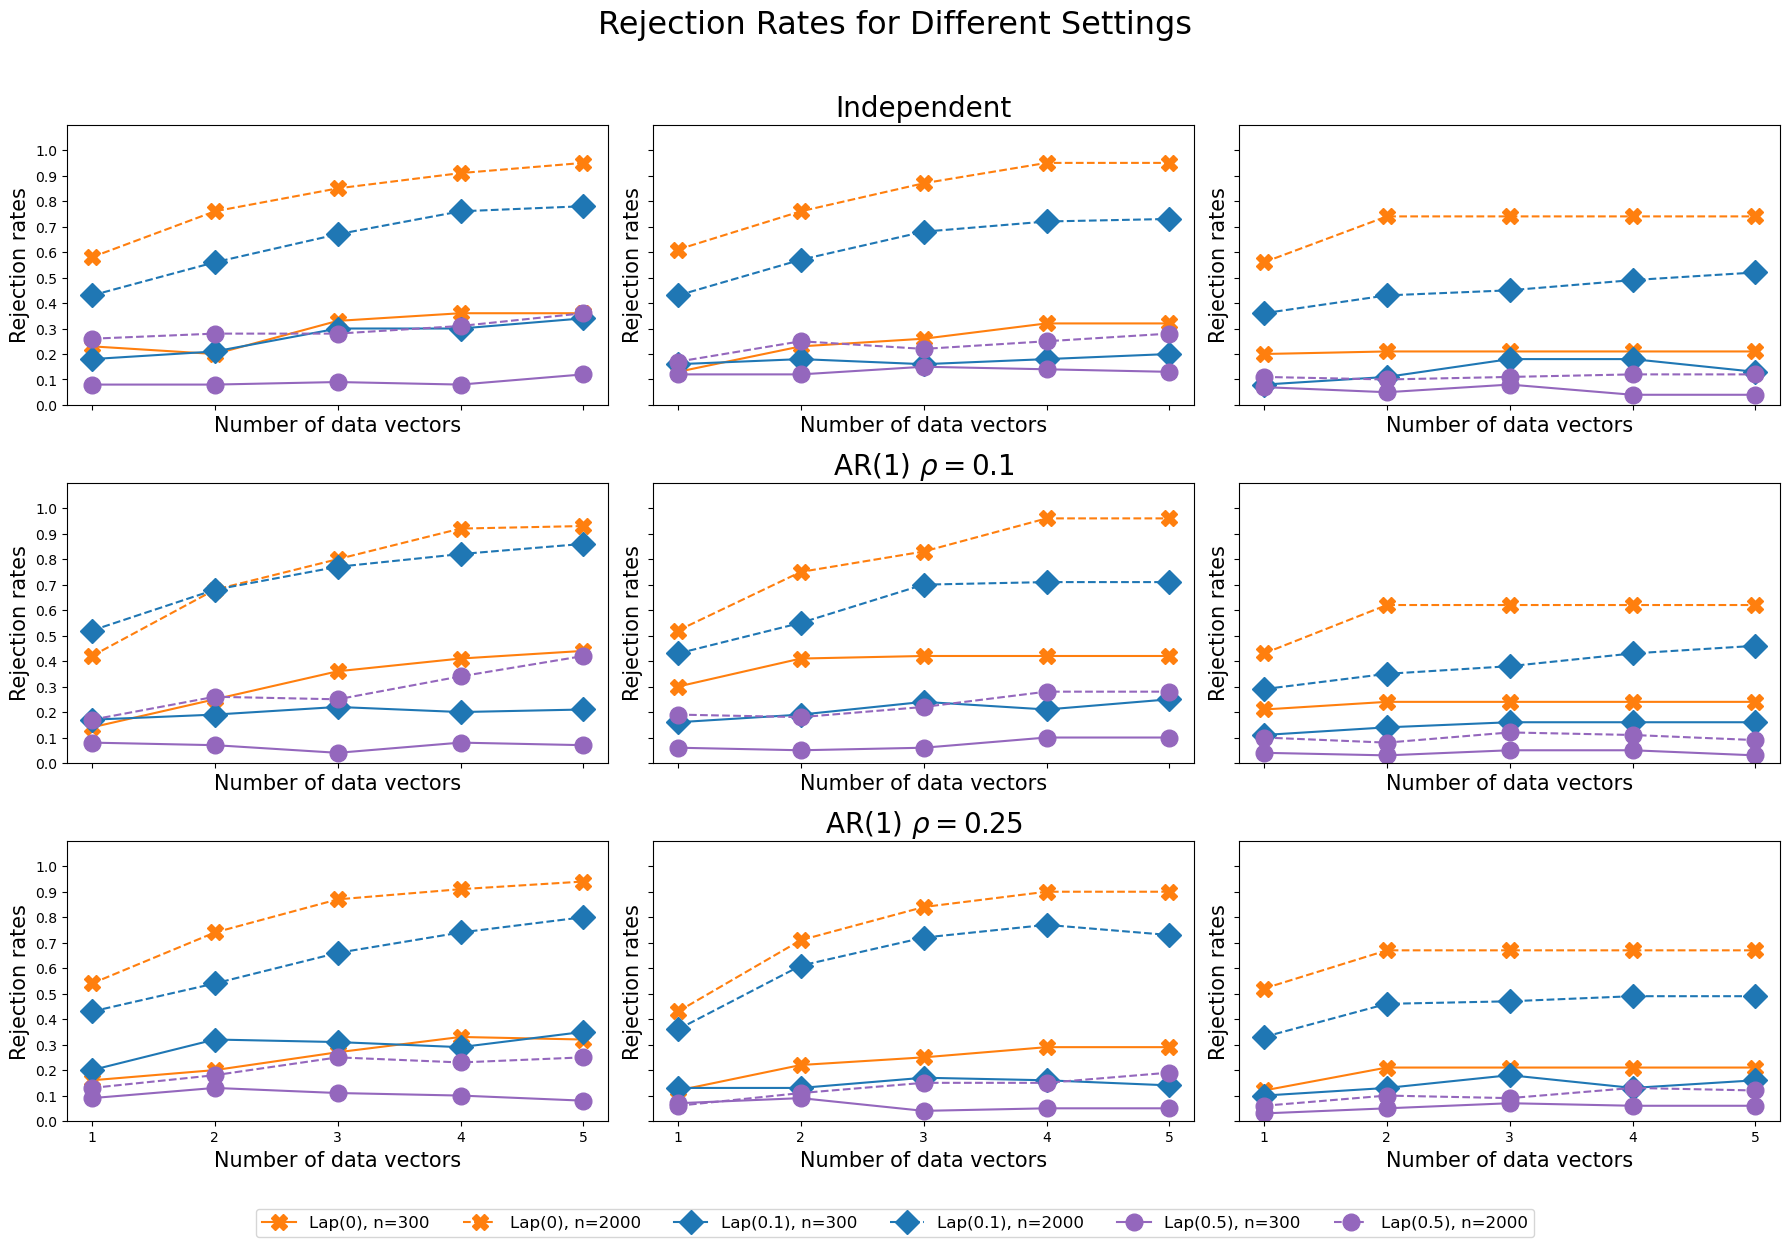

In [61]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=23)

legend_handles = []  # To store legend handles for each subplot
legend_labels = []  # To store legend labels for each subplot

for col, setInd in enumerate(range(1, 4)):
    for row, (Model, sig) in enumerate([(Model, sig) for Model in ModelList for sig in sigList]):

        colorList = ['tab:orange', 'tab:blue', 'tab:purple']
        markerList = ["X", "D", "o", "^", "P", "*"]

        K = 5

        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitle for each row
        if col == 1:  # Set title for the middle column
            ax.set_title(sigtype, fontsize=20)

        for LapscaleInd in range(len(LapscaleList)):
            Lapscale = LapscaleList[LapscaleInd]
            rej_arrayList = []

            for nInd in range(len(nList)):
                n = nList[nInd]

                fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_Lapscale_" + str(Lapscale) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
                infile = open(Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
                new_dict = pickle.load(infile)
                infile.close()
                rej_array = new_dict["rej"]
                rej_arrayList.append(np.mean(rej_array, axis=0))

            line1, = ax.plot(VecInd, rej_arrayList[0], label='Lap(' + str(Lapscale) + '), n=' + str(nList[0]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], markersize=12)
            line2, = ax.plot(VecInd, rej_arrayList[1], label='Lap(' + str(Lapscale) + '), n=' + str(nList[1]), color=colorList[LapscaleInd], marker=markerList[(nInd * LapscaleInd)], linestyle='--', markersize=12)

            if setInd == 1:
                legend_handles.extend([line1, line2])  # Collect handles for legend
                legend_labels.extend([f'Lap({Lapscale}), n={nList[0]}', f'Lap({Lapscale}), n={nList[1]}'])  # Collect labels for legend

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.04, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=15)
        ax.set_ylabel("Rejection rates", fontsize=15)

# Add combined legend at the bottom with only the first two columns, move it downwards
fig.legend(handles=legend_handles[:6], labels=legend_labels[:6], loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05), prop={'size': 12})

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("combined_plot_with_legend.png")
plt.show()